<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
الگوریتم‌ها در علوم داده
            </font>
			<br />
			<br />
بهار ۱۴۰۲
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
مینی‌پروژه‌ی ۱ (Model Selection and Validation)
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#The Model-Selection Curve">
                        The Model-Selection Curve
                    </a>
				</li>
                <li>
					<a href="#Underfit, Fit, Overfit">
                       Underfit, Fit, Overfit
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="The Model-Selection Curve" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
The Model-Selection Curve
        </font>
		<p></p>
		<hr>
در این بخش به ارتباط پیچیدگی مدل با میزان خطا بر روی داده‌های آموزش و تست می‌پردازیم.
<br/>
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
ابتدا کتابخانه‌های numpy و pandas و matplotlib.pyplot را اضافه کنید.
<br/>
	</font>
</div>

In [32]:
# import libraries
######## Code here!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Splitting data to train, validation, and test sets

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
برای شروع بدون استفاده از توابع آماده تابعی بنویسید که یک دیتافریم را در ورودی بگیرد و آن را با توجه به درصد‌های داده شده به مجموعه‌های آموزش، ارزیابی، و تست افراز کند.
        <br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
برای این منظور مراحل زیر را انجام دهید:
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>ابتدا یک کپی از دیتا فریم بگیرید و در متغیر جدید ذخیره کنید. این کار برای جلوگیری از تغییر در داده‌های اصلی است.</li>
        <li>با استفاده از توابع کتابخانه pandas داده‌ها را shuffle کنید.</li>
        <li>به ترتیب با توجه به درصدهای داده شده داده‌ها را به سه مجموعه‌ی آموزش، ارزیابی و تست افراز کنید.</li>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

In [33]:
# train_test_split from scratch
######## Code here!
def trainValidationTestSplit(df, train_ratio, validation_ratio):
    # copy dataframe to a new variable
    new_df = df.copy()
    
    # shuffle new dataframe
    new_df = new_df.sample(frac = 1)
    
    # split data to train, validation, and test
    total_rows = new_df.shape[0]
    train_size = int(total_rows * train_ratio)
    train = new_df[: train_size]
    validation_size = int(total_rows * validation_ratio)
    validation = new_df[train_size: train_size + validation_size]
    test = new_df[train_size + validation_size: ]
    
    # return sets
    return train, validation, test

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در اینجا چند تابع ضروری را تعریف می‌کنیم:
<br/>
	</font>
</div>

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

In [17]:
import matplotlib as mpl
# Default parameters for matplotlib plots
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 22

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
مجموعه داده‌های train و test را از طریق خاوندن فایل csv متناظرشان بخوانید.
<br/>
	</font>
</div>

In [50]:
# reading train and test datasets
######## Code here!
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
مجموعه‌ی آموزش و تست را با هم ترکیب کنید (به وسیله‌ی تابع append در pandas)
<br/>
	</font>
</div>

In [ ]:
# combine trainset and dataset
######## Code here!
df_comb = df_train.append(df_test, sort = True)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
متغیر X را با استفاده از تابع DataFrame در pandas مقداردهی اولیه (initialize) کنید.
<br/>
	</font>
</div>

In [30]:
# initialize a variable as pandas dataframe
######## Code here!
X = pd.DataFrame()

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
تابعی بنوسید که به ازای رشته‌ی ورودی female عدد 1 و درغیر اینصورت عدد 0 را بازگرداند.
<br/>
	</font>
</div>

In [31]:
# a function to to convert strings 'male' and 'female' to 0 and 1 respectively
######## Code here!
def encode_gender(x):
    return 1 if x == 'female' else 0

In [37]:
def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Gender'] = df_comb.Gender.map(encode_gender)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [38]:
fare_median = df_train.groupby(['Gender', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Gender', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Gender', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)


In [39]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))

In [40]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived

In [41]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [42]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

In [43]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()

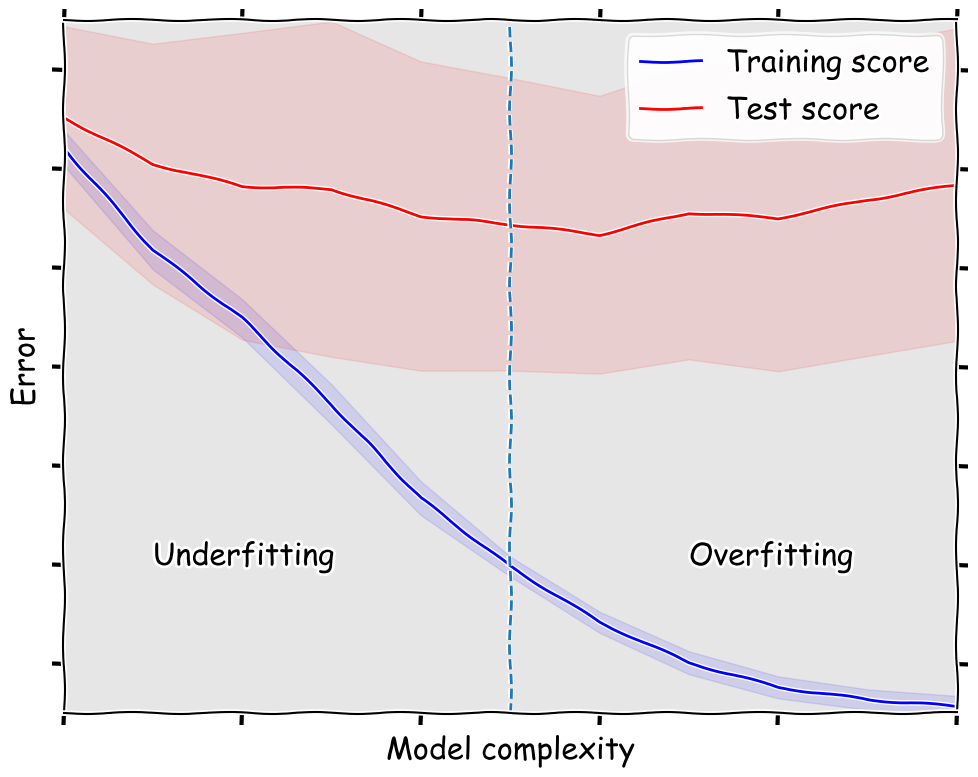

In [47]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2, 13))

<p></p>
<br />
<div id="Underfit, Fit, Overfit" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
Underfit, Fit, Overfit
        </font>
		<p></p>
		<hr>
در این بخش به ارتباط پیچیدگی مدل با مفاهیمی چون Overfitting و Underfitting می‌پردازیم.
<br/>
<br/><br/>
	</font>
</div>

In [52]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from gradient_descent import *
%load_ext autoreload
%autoreload 2

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
تابعی بنوسید که میانگین مربعات خطا را به ازای خطا بردار ورودی به دست آورد. توجه شود کمه در ورودی یک وکتور خطاها داده شده است.
<br/>
	</font>
</div>

In [72]:
# function to calculate mean squared error of a vector
######## Code here!
def compute_mse(e):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
تابعی بنوسید که مسدله‌ی کمترین مربعات (Least Squares) را به ازای ورود‌های y و tx را حل کند.
<br/>
	</font>
</div>

In [ ]:
def compute_loss(y, tx, w):
    """Calculate the mse loss."""
    e = y - tx.dot(w)
    return calculate_mse(e)


# least squares
######## Code here!
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.
    """
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
########
    
    w = np.linalg.solve(a, b)
    mse = compute_loss(y, tx, w)
    return w, mse

In [55]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w, mse = least_squares(y, tx)
    w_gd, mse_gd = gradient_descent(y, tx, initial_w=np.array([0,0]), max_iters=10, gamma=0.7)
    print("Solution LS: ", w, "MSE: ", mse)
    print("Solution GD: ", w_gd[-1], "MSE: ", mse_gd[-1])

In [56]:
test_your_least_squares()

Solution LS:  [73.293922   13.47971243] MSE:  15.3858878688294
Solution GD:  [73.29348921 13.47963284] MSE:  15.385888944638305


In [57]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
تابعی بنویسید که در ورودی داده‌ی x و درجه‌ی مورد نظر را بگیرد و به ازای همه‌ی اعداد از 0 تا درجه‌ی داده شده داده‌ها را به توان آن اعداد برساند و به ازای هر توان آن‌ها را در ستون‌های ماتریس خروجی قرار دهد و در نهایت آن را برگرداند.
        <br/>
	</font>
</div>

In [73]:
# build the polynomial regarding the data x
######## Code here!
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [75]:
# test build_poly
build_poly([-2, 1, 0, 1], 5)

array([[  1.,  -2.,   4.,  -8.,  16., -32.],
       [  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.,   1.]])

In [76]:
from plots import *
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        
        # form dataset to do polynomial regression.
        ######## Code here!
        tx = build_poly(x, degree)

        # least squares
        ######## Code here!
        weights, mse = least_squares(y, tx)

        # compute RMSE
        ######## Code here!
        rmse = np.sqrt(2 * mse)
        
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248674


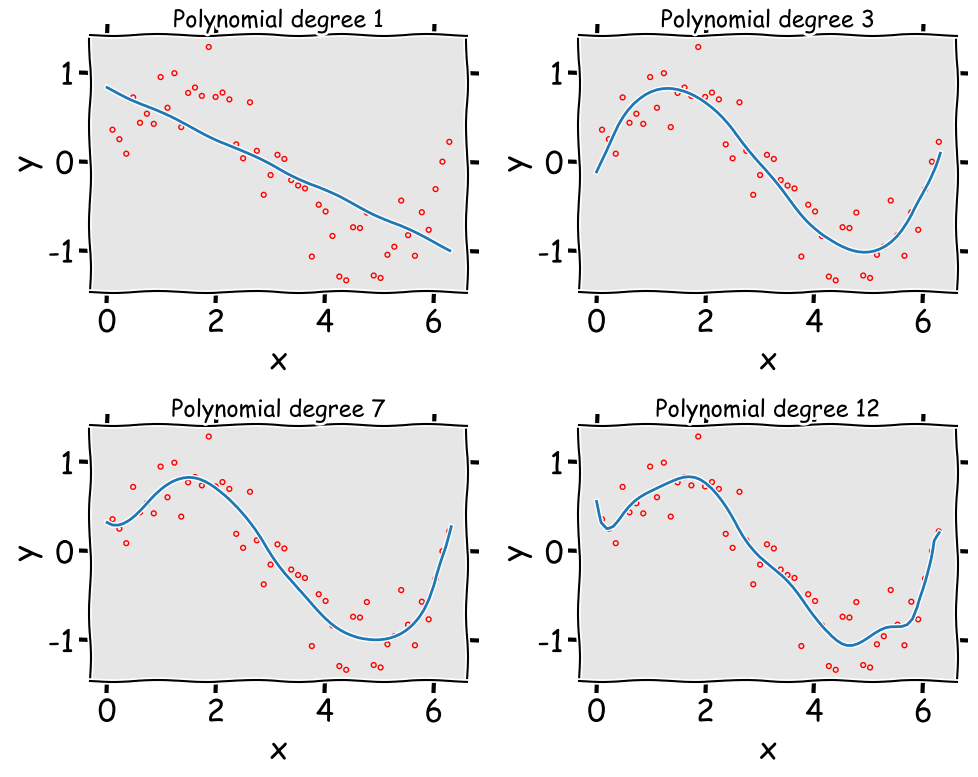

In [77]:
polynomial_regression()

In [78]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [79]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # form tx
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)

    w, mse_tr = least_squares(y_tr, tx_tr)

    # calculate RMSE for train and test data.
    rmse_tr = np.sqrt(2 * mse_tr)
    rmse_te = np.sqrt(2 * compute_loss(y_te, tx_te, w))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te)) 
    return y_tr, x_tr, y_te, x_te, w  

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.7, degree=1, Training RMSE=0.516, Testing RMSE=0.352
proportion=0.7, degree=3, Training RMSE=0.249, Testing RMSE=0.308
proportion=0.7, degree=7, Training RMSE=0.227, Testing RMSE=0.333
proportion=0.7, degree=12, Training RMSE=0.223, Testing RMSE=0.328
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.548
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.254
proport

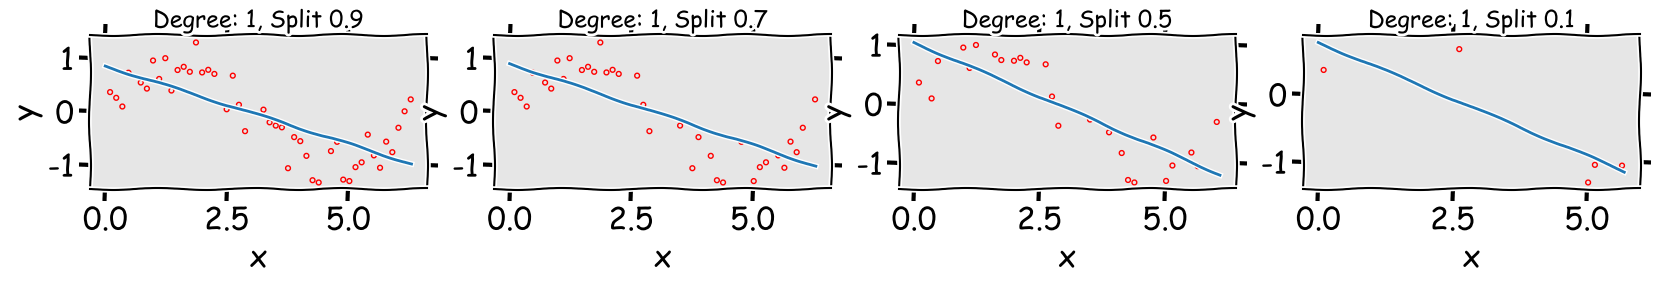

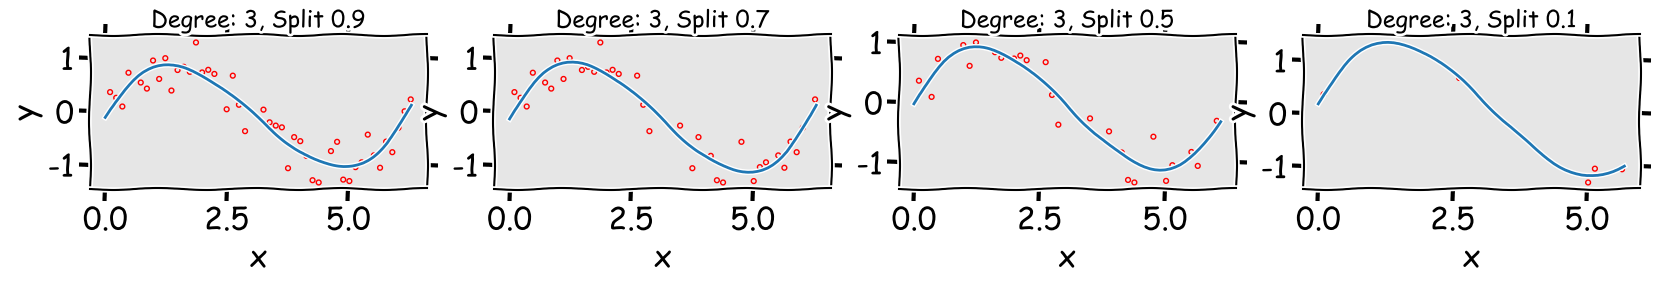

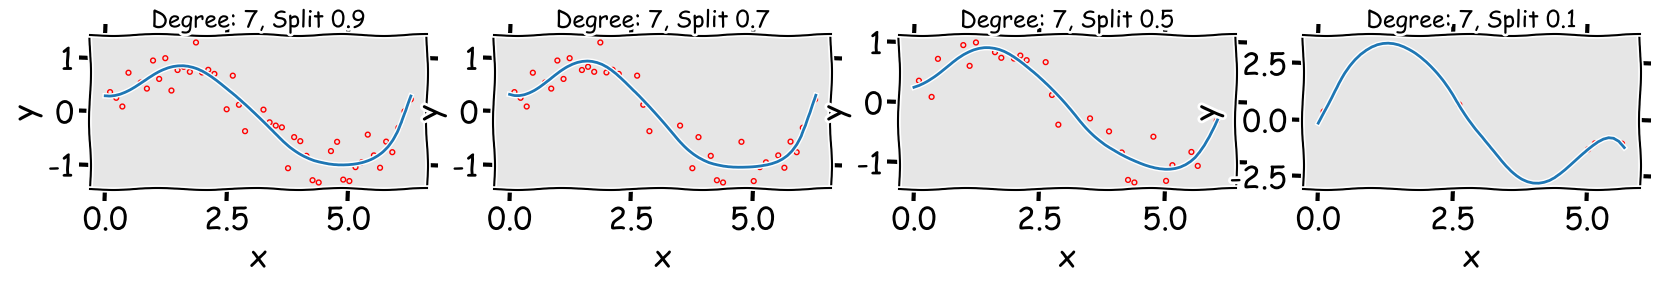

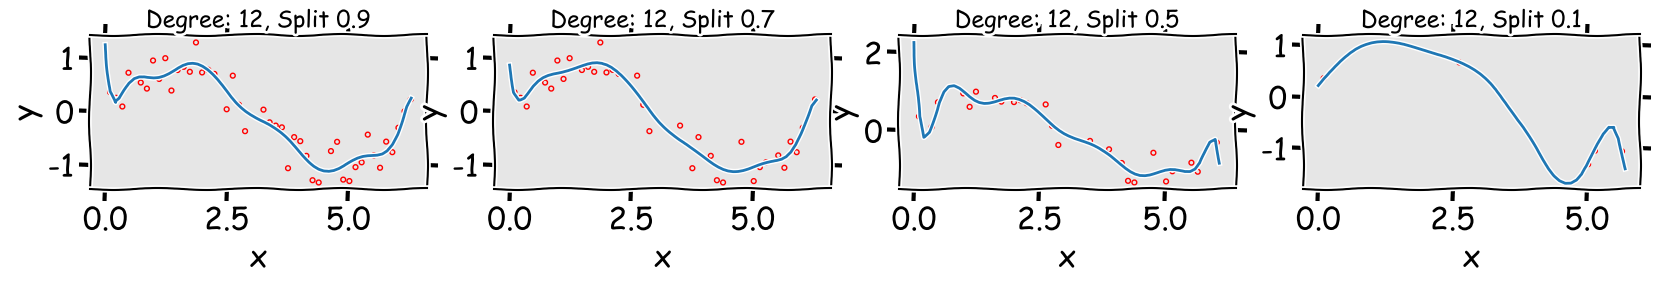

In [80]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 1
num_col = 4
axs = [plt.subplots(num_row, num_col, figsize=(20,2))[1] for _ in range(len(degrees))]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        y_tr, x_tr, y_te, x_te, w = train_test_split_demo(x, y, degree, split_ratio, seed)
        plot_fitted_curve(
            y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind % num_col].set_title(f'Degree: {degree}, Split {split_ratio}')